In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Over-determined

In [2]:
# paramater model
a = 0.3
b = 0.4

# variabel bebas
x = np.arange(1,11)

# d_obs atau d sintetik
d_obs = a + (b*x)

# membuat noise
np.random.seed(10)
noise = np.random.normal(1, 0.4, len(d_obs))

# d_obs_noise
d_obs_noise = d_obs+noise

d_obs_noise[0] = d_obs_noise[0] -5
d_obs_noise[2] = d_obs_noise[2] -5

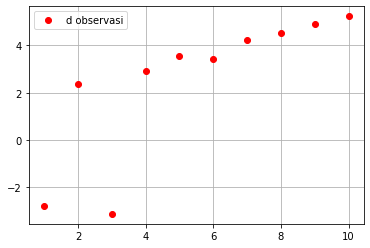

In [3]:
# plotting
plt.plot(x, d_obs_noise, "ro", label="d observasi")
plt.grid()
plt.legend()
plt.show()

# $m = [G^TG]^{-1}G^Td$

In [4]:
# matriks kernel
G = np.column_stack([x**0, x])

# inversi
m_calc = (np.linalg.inv(np.transpose(G).dot(G))).dot(np.transpose(G)).dot(d_obs_noise)

# d calculated
d_calc = m_calc[0]+(m_calc[1]*x)

m_calc

array([-1.86564222,  0.79810283])

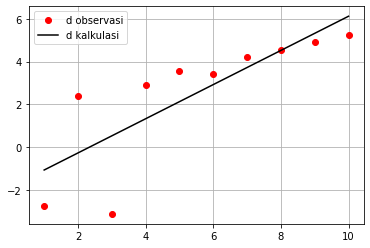

In [5]:
# plotting
plt.plot(x, d_obs_noise, "ro", label="d observasi")
plt.plot(x, d_calc, "k-", label="d kalkulasi")
plt.grid()
plt.legend()
plt.show()

### kriteria solusi: misfit minimum
### $E = e^Te = [d-Gm]^T [d-Gm]$ 

In [6]:
E1 = np.transpose(d_obs_noise - (G.dot(m_calc))).dot((d_obs_noise - G.dot(m_calc)))
E1

29.16338587100246

# Weighting

In [7]:
# weight
We = np.identity(len(x))
We[0,0] = 0.1
We[2,2] = 0.1
We

array([[0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

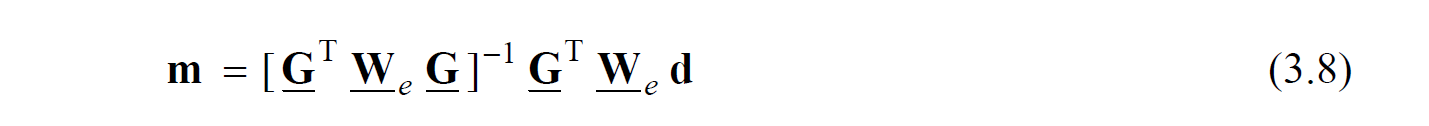

In [8]:
# inversi berbobot
m_calc_we = (np.linalg.inv(np.transpose(G).dot(We).dot(G)).dot(np.transpose(G)).dot(We).dot(d_obs_noise))

# d calculated with weight
d_calc_we = m_calc_we[0] + (m_calc_we[1]*x)

m_calc_we

array([0.90964255, 0.44897154])

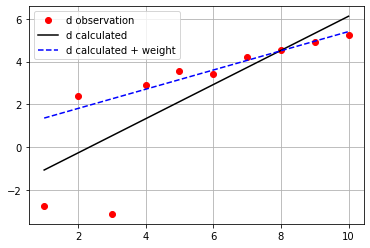

In [9]:
# plotting
#plt.subplots(figsize=(12,6))
plt.plot(x, d_obs_noise, "ro", label="d observation")
plt.plot(x, d_calc, "k-", label="d calculated")
plt.plot(x, d_calc_we, "b--", label="d calculated + weight")
plt.grid('on')
plt.legend()
#plt.savefig("plot.png")
plt.show()

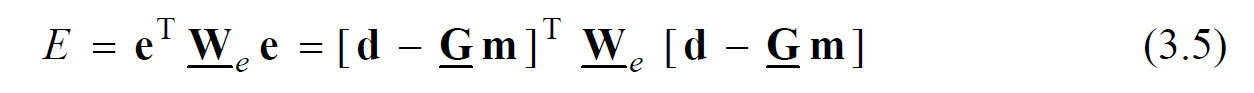

In [10]:
E2 = np.transpose(d_obs_noise - (G.dot(m_calc_we))).dot(We).dot((d_obs_noise - G.dot(m_calc_we)))
E2

5.210688650294955

In [11]:
print("misfit tanpa weight:", E1)
print("misfit dengan weight:", E2)

misfit tanpa weight: 29.16338587100246
misfit dengan weight: 5.210688650294955
